In [4]:
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt

In [5]:
dicom_file = pydicom.read_file("imgs/1-001.dcm")

In [6]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.61562882741766589207544921171198606091
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'MPR', 'CSA MPR', '', 'CSAPARALLEL', 'M', 'ND', 'NORM']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                 

In [4]:
type(dicom_file)

pydicom.dataset.FileDataset

In [10]:
dicom_file[0x008,0x0030]

(0008, 0030) Study Time                          TM: '103630.723000'

In [7]:
dicom_file.Rows

256

In [8]:
mri = dicom_file.pixel_array

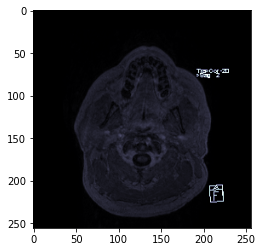

In [16]:
plt.imshow(mri, cmap="bone")

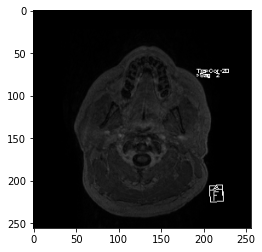

In [13]:
plt.imshow(mri, cmap="gray")

In [17]:
path_to_head_mri = Path("imgs/")

In [20]:
all_files = list(path_to_head_mri.glob("*"))

In [21]:
all_files

[WindowsPath('imgs/1-001.dcm'),
 WindowsPath('imgs/1-002.dcm'),
 WindowsPath('imgs/1-003.dcm'),
 WindowsPath('imgs/1-004.dcm'),
 WindowsPath('imgs/1-005.dcm'),
 WindowsPath('imgs/1-006.dcm'),
 WindowsPath('imgs/1-007.dcm'),
 WindowsPath('imgs/1-008.dcm'),
 WindowsPath('imgs/1-009.dcm'),
 WindowsPath('imgs/1-010.dcm')]

In [29]:
mri_data = []

for path in all_files:
    data = pydicom.read_file(path)
    mri_data.append(data)

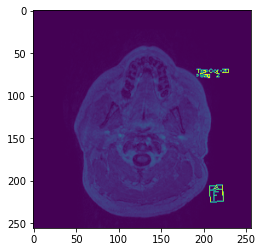

In [36]:
plt.imshow(mri_data[0].pixel_array)

In [40]:
full_volume = []
for mri in mri_data:
    full_volume.append(mri.pixel_array)

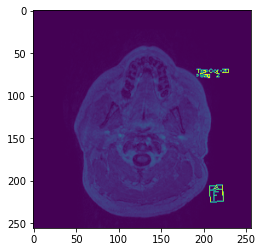

In [42]:
plt.imshow(full_volume[0])

## Display all images

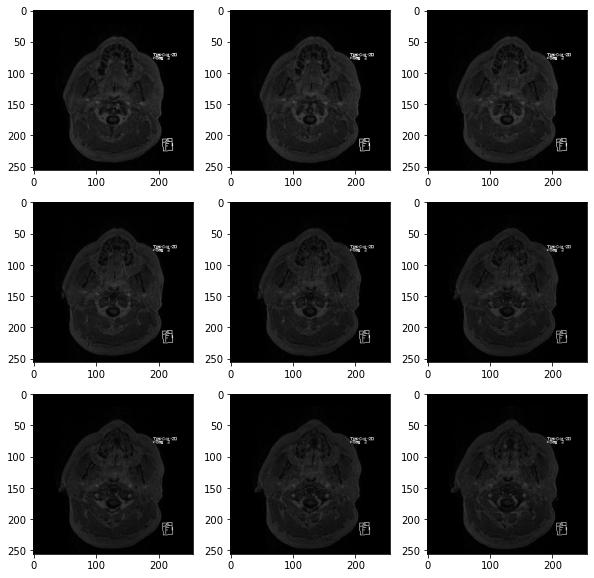

In [46]:
fig, axis = plt.subplots(3,3, figsize=(10,10))

mri_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(full_volume[mri_counter], cmap="gray")
        mri_counter += 1

In [55]:
import SimpleITK as sitk

In [56]:
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))
print(series_ids)

('1.3.6.1.4.1.14519.5.2.1.125028729667929862870977139505755680512',)


In [57]:
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri), series_ids[0])
series_file_names

('imgs\\1-001.dcm',
 'imgs\\1-002.dcm',
 'imgs\\1-003.dcm',
 'imgs\\1-004.dcm',
 'imgs\\1-005.dcm',
 'imgs\\1-006.dcm',
 'imgs\\1-007.dcm',
 'imgs\\1-008.dcm',
 'imgs\\1-009.dcm',
 'imgs\\1-010.dcm')

In [60]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)

In [61]:
image_data = series_reader.Execute()

In [62]:
head_mri = sitk.GetArrayFromImage(image_data)

In [63]:
head_mri.shape

(10, 256, 256)